In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("FuelConsumption.csv")

**checking dataset**

In [7]:
print(df.info())
print(df.describe())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None
         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   639.0   639.000000  639.000000        639.000000    639.000000
mean   2000.0     3.265728    5.805947         14.713615    296.809077
std       0.0     1.231012    1.625588          3.

**creating df with imp columns**

In [8]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [10]:
cdf=df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]  ### Selected appended and DataFrame create
cdf.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


In [11]:
cdf.shape

(639, 4)

**creating histro graph between dependent and independent variablews**

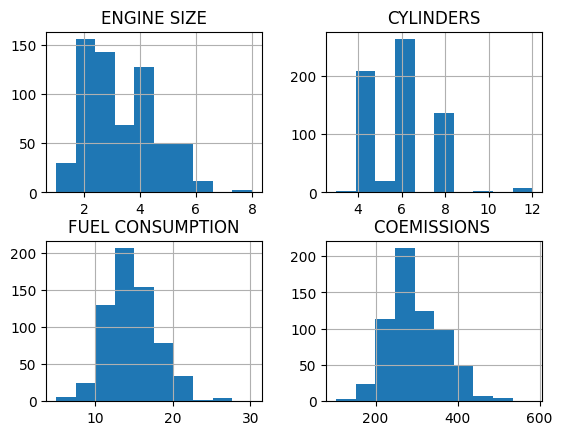

In [12]:
viz = cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
viz.hist()
plt.show()


**creating scatterploat graph between dependent and independent variablews**

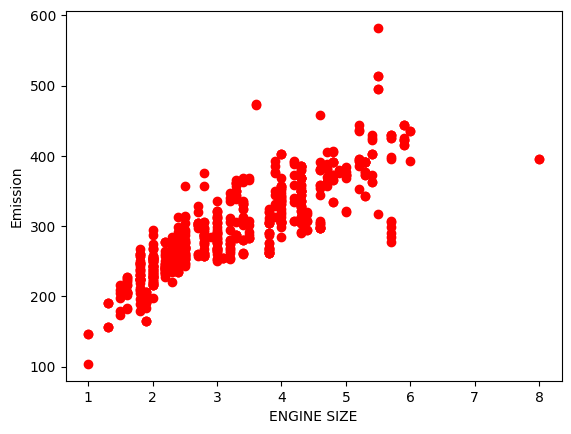

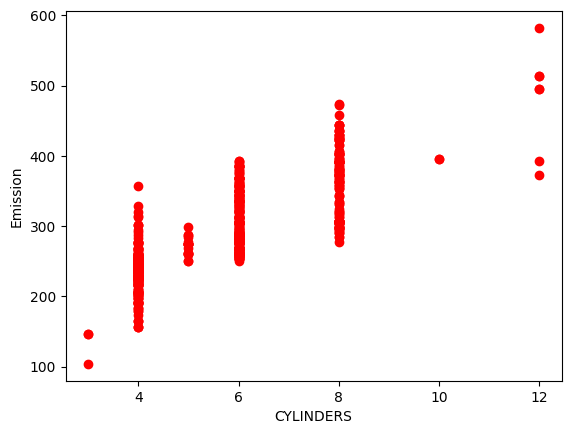

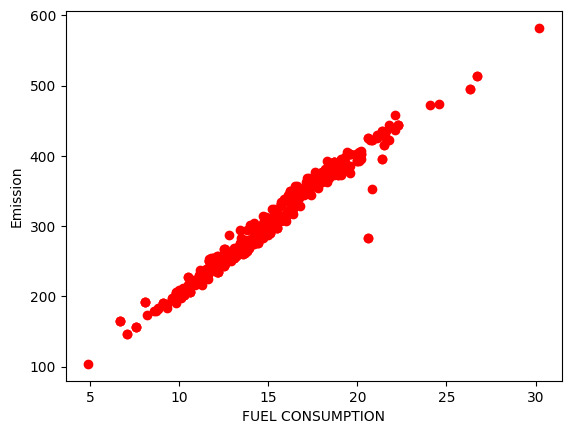

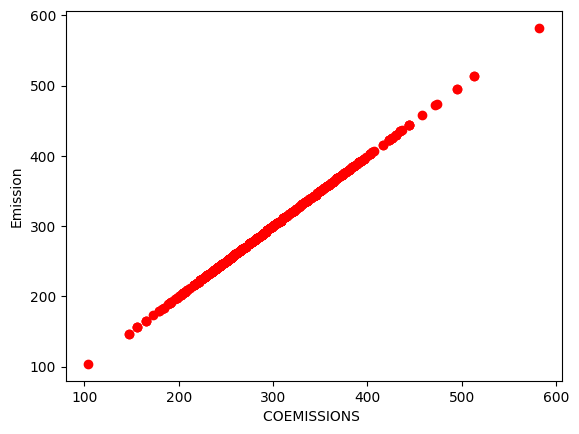

In [16]:

for i in cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '],color='red')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()


#### Creating Train and Test Data

In [21]:
mask =np.random.rand(len(df))<0.80
#print(mask)
train=cdf[mask]
test = cdf[~mask]
train
print(train)

     ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
0            1.6          4              10.5           216
1            1.6          4               9.8           205
2            3.2          6              13.7           265
3            3.5          6              15.0           301
4            1.8          4              11.4           230
..           ...        ...               ...           ...
631          2.8          6              15.1           297
633          2.4          5              12.6           251
634          2.4          5              14.4           288
636          2.3          5              13.9           274
638          2.4          5              14.7           299

[520 rows x 4 columns]


In [22]:
print(test)

     ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
5            1.8          4              10.6           219
8            3.2          6              15.4           306
29           1.8          4              12.3           246
38           2.8          6              13.0           258
47           4.4          8              15.5           320
..           ...        ...               ...           ...
610          1.8          4              13.2           258
613          2.8          6              13.4           262
632          2.4          5              13.2           262
635          2.4          5              13.6           274
637          2.3          5              13.0           260

[119 rows x 4 columns]


#### Check train data pattern

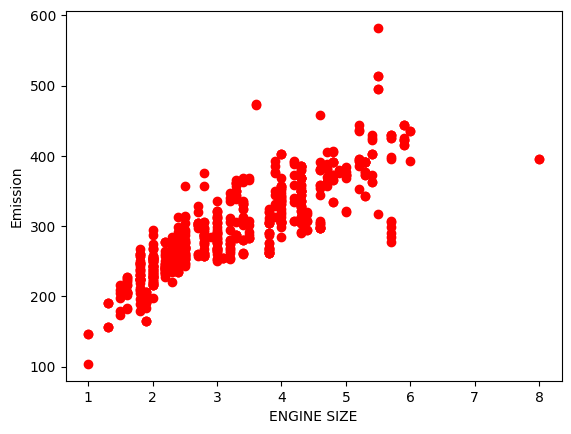

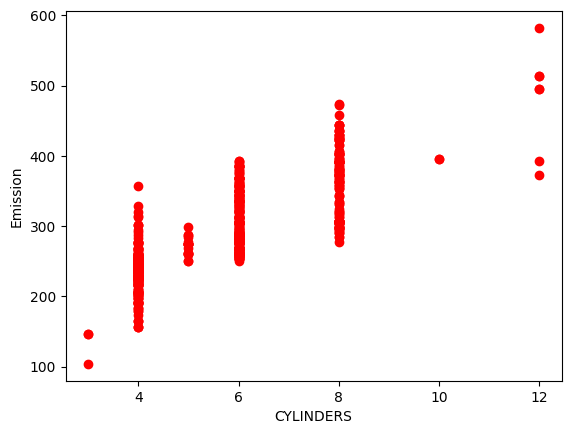

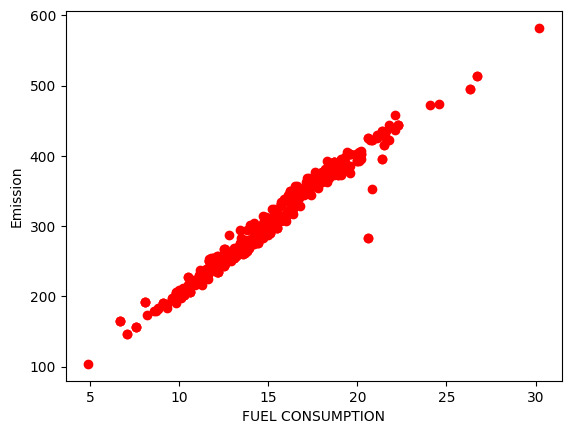

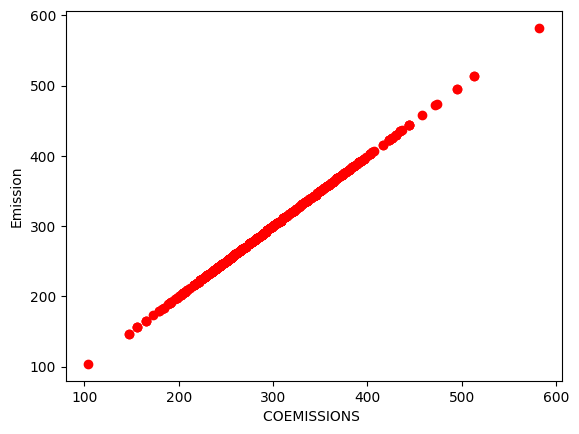

In [23]:

for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '],color='red')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

### Applyin linear regration on train data

In [24]:
coefficient=[]
intercept=[]
regress_model={}
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    regr=linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y=  np.asanyarray(train[['COEMISSIONS ']])
    regr.fit(train_x, train_y)
    regress_model[i]=regr
    print("Relation between {} & {}".format(i,"'COEMISSIONS'"))
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    
    print('\n')


Relation between ENGINE SIZE & 'COEMISSIONS'
Coefficients:  [[45.22625319]]
Intercept:  [148.96989368]


Relation between CYLINDERS & 'COEMISSIONS'
Coefficients:  [[32.54102882]]
Intercept:  [106.8404992]


Relation between FUEL CONSUMPTION & 'COEMISSIONS'
Coefficients:  [[19.31507154]]
Intercept:  [12.26502359]


Relation between COEMISSIONS  & 'COEMISSIONS'
Coefficients:  [[1.]]
Intercept:  [-5.68434189e-14]




(520,)
(520,)


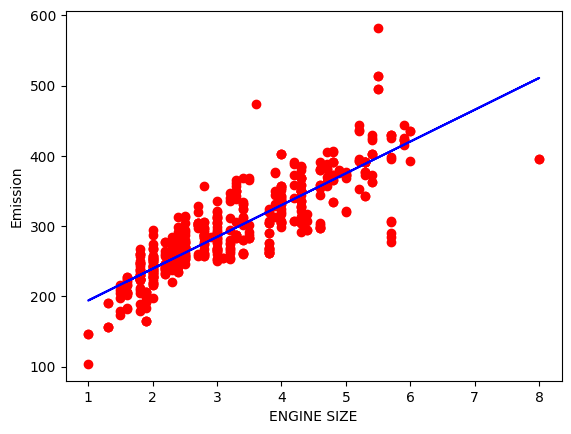

(520,)
(520,)


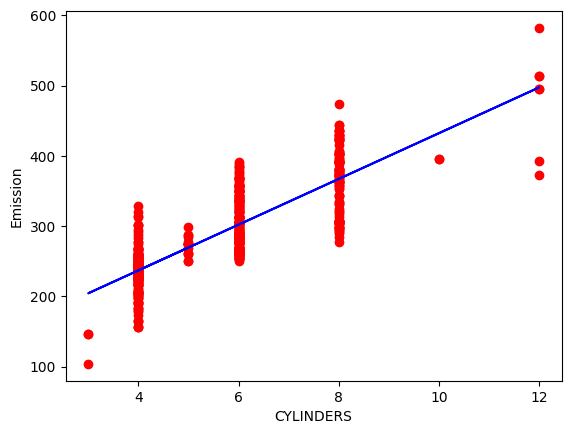

(520,)
(520,)


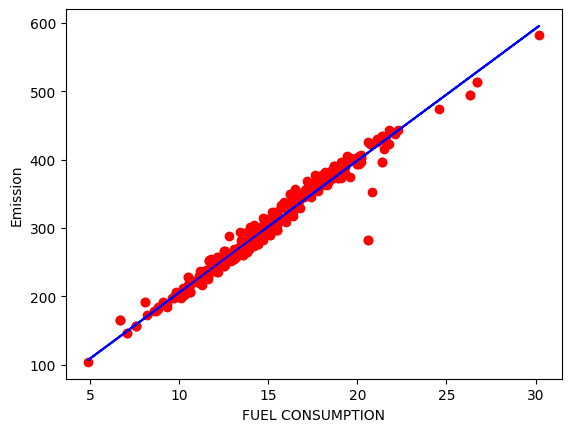

(520,)
(520,)


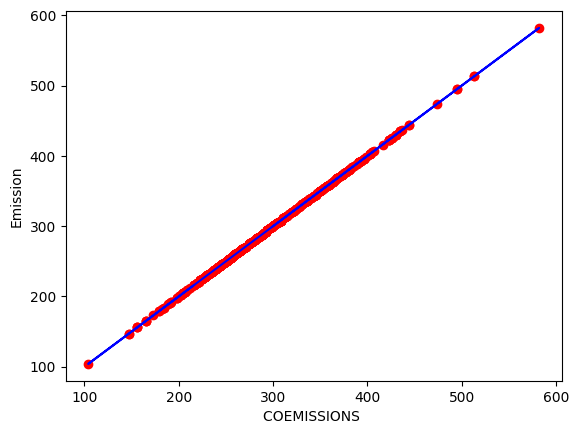

In [27]:
j=0
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i], train['COEMISSIONS '],  color='red')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x, y, '-b')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()
    j=j+1


#### Evalute model performacnce on test data

In [28]:
from sklearn.metrics import r2_score

for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    test_x = np.asanyarray(test[[i]])
    test_y = np.asanyarray(test[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'CO2EMISSIONS'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    print('\n')


Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 27.08
Residual sum of squares (MSE): 1368.90
R2-score: 0.49


Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 36.28
Residual sum of squares (MSE): 2038.00
R2-score: 0.12


Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 7.36
Residual sum of squares (MSE): 90.74
R2-score: 0.97


Fitting Error between COEMISSIONS  & 'CO2EMISSIONS'
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


